In [1]:
import pandas as pd
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [2]:
tempTopDir = os.path.abspath('/Volumes/Britt_SSD/ReDoEvals3/')
combo_df = pd.DataFrame()

In [3]:
df_list = []

pp700K_Path = os.path.join(tempTopDir, 'pp700.parquet')
pp700K_df = pd.read_parquet(pp700K_Path)
df_list.append(pp700K_df)

pp23_Path = os.path.join(tempTopDir, "pp23.parquet")
pp23M_DF = pd.read_parquet(pp23_Path)
df_list.append(pp23M_DF)

fear2M_Path = os.path.join(tempTopDir, 'fear2.parquet')
fear2M_DF = pd.read_parquet(fear2M_Path)
df_list.append(fear2M_DF)

fear18_Path = os.path.join(tempTopDir, 'fear18.parquet')
fear18M_df = pd.read_parquet(fear18_Path)
df_list.append(fear18M_df)

nml3_Path = os.path.join(tempTopDir, 'nml3.parquet')
nml3M_DF = pd.read_parquet(nml3_Path)
df_list.append(nml3M_DF)

nml21_Path = os.path.join(tempTopDir, 'nml21.parquet')
nml21M_DF = pd.read_parquet(nml21_Path)
df_list.append(nml21M_DF)

std300K_Path = os.path.join(tempTopDir, 'std300.parquet')
std300k_df = pd.read_parquet(std300K_Path)
df_list.append(std300k_df)

std2M_Path = os.path.join(tempTopDir, 'std2.parquet')
std2M_df = pd.read_parquet(std2M_Path)
df_list.append(std2M_df)

std23M_Path = os.path.join(tempTopDir, 'std23.parquet')
std23M_df = pd.read_parquet(std23M_Path)
df_list.append(std23M_df)

std23M_2Path = os.path.join(tempTopDir, 'std23_2.parquet')
std23M_2df = pd.read_parquet(std23M_2Path)
df_list.append(std23M_2df)


In [4]:
combo_df_Valid = pd.DataFrame()

for index, df in enumerate(df_list):
    combo_df_Valid = pd.concat([combo_df_Valid,df],ignore_index=True)


In [5]:

conds = [combo_df_Valid['agent']=='pop700',combo_df_Valid['agent']=='pop23',combo_df_Valid['agent']=='fear2', \
         combo_df_Valid['agent']=='fear18',combo_df_Valid['agent']=='nml3', combo_df_Valid['agent']=='nml21',  \
         combo_df_Valid['agent']=='std300', combo_df_Valid['agent']=='std2', combo_df_Valid['agent']=='std23', \
         combo_df_Valid['agent']=='std232']

choices = ["PowerPill_700k","PowerPill_23M","FearGhosts_2M","FearGhosts_18M", "Dots_3M", \
           "Dots_21M", "Standard_300k", "Standard_2M", "Standard_23_run1", "Standard_23_run2"]

combo_df_Valid['agent'] = np.select(conds, choices)
agent_names = combo_df_Valid.agent.unique()
print(combo_df_Valid.agent.unique())

['PowerPill_700k' 'PowerPill_23M' 'FearGhosts_2M' 'FearGhosts_18M'
 'Dots_3M' 'Dots_21M' 'Standard_300k' 'Standard_2M' 'Standard_23_run1'
 'Standard_23_run2']


In [6]:
print(combo_df_Valid.agent.unique())
print(combo_df_Valid.agentNum.unique())
print(combo_df_Valid.keyNum.unique())
print(combo_df_Valid.isDBG.unique())

['PowerPill_700k' 'PowerPill_23M' 'FearGhosts_2M' 'FearGhosts_18M'
 'Dots_3M' 'Dots_21M' 'Standard_300k' 'Standard_2M' 'Standard_23_run1'
 'Standard_23_run2']
[0 1 2 3 4 5 6 7 8 9]
[0. 1. 2. 3. 4. 5.]
[1 0]


In [7]:
# d = {'pop700':0,'pop23':1,'fear2':2,'fear18':3,'nml3':4,'nml21':5,'std300':6,'std2':7, 'std23':8, 'std23_2':9}
# combo_df_Valid["agentNum"] = combo_df_Valid['agent'].map(d)

combo_df_Valid["agentNum"]

0        0
1        0
2        0
3        0
4        0
        ..
99955    9
99956    9
99957    9
99958    9
99959    9
Name: agentNum, Length: 99960, dtype: int64

In [8]:
combo_df_Valid["agent"]

0          PowerPill_700k
1          PowerPill_700k
2          PowerPill_700k
3          PowerPill_700k
4          PowerPill_700k
               ...       
99955    Standard_23_run2
99956    Standard_23_run2
99957    Standard_23_run2
99958    Standard_23_run2
99959    Standard_23_run2
Name: agent, Length: 99960, dtype: object

In [9]:
combo_df_Valid['bigRewardNum'] = combo_df_Valid['bigRewardNum'].fillna(0)
combo_df_Valid.bigRewardNum.unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55.])

In [10]:
for index, agent in enumerate(combo_df_Valid.agentNum.unique()):
    temp = combo_df_Valid[combo_df_Valid['agentNum']==agent]
    for key_index, num in enumerate(temp.keyNum.unique()):
        if(num > 0):
            temp2 = temp[temp['keyNum']==num]
            if (index == 0):
            #['pop700' 
                query = [0,1,0,0,1]
                
                temp2['isDBG'] = query[key_index - 1]

                
            if (index == 1):    
            #'pop23' 
                query = [1,1,1,1,0]
                
                temp2['isDBG'] = query[key_index - 1]


            if (index == 2):    
            #'fear2' 
                query = [1,0,0,0,0]
                
                temp2['isDBG'] = query[key_index - 1]

                
            if (index == 3):   
            #'fear18' 
                query = [0,0,0,1,0]
                
                temp2['isDBG'] = query[key_index - 1]

                
            if (index == 4):   
            #'nml3' 
                query = [0,0,0,0,0]
                
                temp2['isDBG'] = query[key_index - 1]

                
            if (index == 5):   
            #'nml21' 
                query = [1,1,1,1,0]
                
                temp2['isDBG'] = query[key_index - 1]

                
            if (index == 6):    
            #'std300' 
                query = [0,1,0,0,1]
                
                temp2['isDBG'] = query[key_index - 1]

                
            if (index == 7):   
            #'std2' 
                query = [1,0,0,0,1]
                
                temp2['isDBG'] = query[key_index - 1]

                
            if (index == 8):   
            #'std23'
                query = [0,1,0,1,1]
                
                temp2['isDBG'] = query[key_index - 1]


            if (index == 9):
            #'std232']
                query = [0,1,0,1,1]
                
                temp2['isDBG'] = query[key_index - 1]
                
            combo_df_Valid.update(temp2)
                

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [11]:
table = pa.Table.from_pandas(combo_df_Valid)
# Parquet with Brotli compression
filePath = os.path.join(tempTopDir, 'comboEval.parquet')
pq.write_table(table, filePath, compression='BROTLI')
# And save to CSV for permanent storage
# combo_df_Valid.to_csv('/Users/byrdsmyth/Documents/School/Classes/CPTS575/Project/comboEval.csv')

In [12]:
combo_df = pd.read_parquet(filePath)

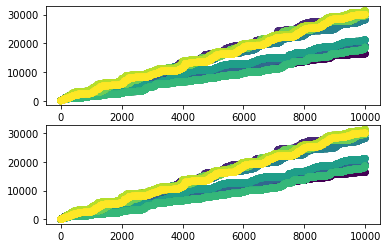

In [13]:
plt.subplot(2, 1, 1)
plt.scatter("state", "total_reward", c='agentNum', data=combo_df)
plt.subplot(2, 1, 2)
plt.scatter("state", "total_reward", c='agentNum', data=combo_df_Valid)

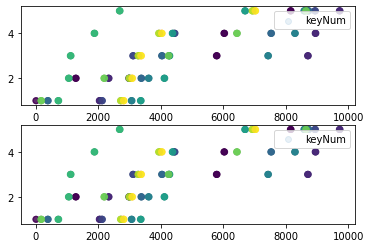

In [14]:
plt.subplot(2, 1, 1)
temp = combo_df[combo_df["keyNum"]>0]
plt.scatter("state", "keyNum", c='agentNum', alpha=0.1, data=temp)
plt.legend(loc="best")

plt.subplot(2, 1, 2)
temp = combo_df_Valid[combo_df_Valid["keyNum"]>0]
plt.scatter("state", "keyNum", c='agentNum', alpha=0.1, data=temp)
plt.legend(loc="best")

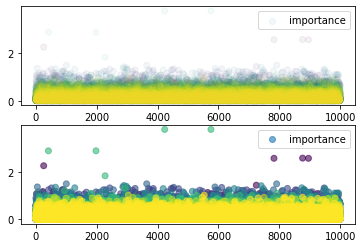

In [15]:
plt.subplot(2, 1, 1)
plt.scatter("state", "importance", c='agentNum', alpha=0.06, data=combo_df)
plt.legend(loc="best")

plt.subplot(2, 1, 2)
plt.scatter("state", "importance", c='agentNum', alpha=0.6, data=combo_df_Valid)
plt.legend(loc="best")

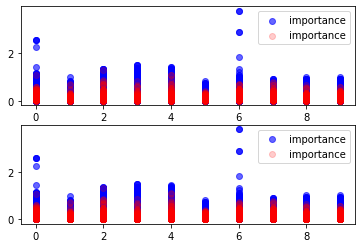

In [16]:
plt.subplot(2, 1, 1)
plt.scatter("agentNum", "importance", c="b", alpha=0.6, data=combo_df)
plt.scatter("agentNum", "importance", c="r", alpha=0.2, data=temp)
plt.legend(loc="best")

plt.subplot(2, 1, 2)
plt.scatter("agentNum", "importance", c="b", alpha=0.6, data=combo_df_Valid)
plt.scatter("agentNum", "importance", c="r", alpha=0.2, data=temp)
plt.legend(loc="best")

In [17]:
val = 0.25
for index, agent in enumerate(df_list):
    temp = agent[agent["keyNum"]>0]
    plt.scatter("to_ghosts_mean", "to_top_pills_mean", alpha=1, data=temp, label = names[index])
plt.legend(loc="best")

NameError: name 'names' is not defined

In [ ]:
val = 0.25
for index, agent in enumerate(df_list):
    temp = agent[agent["keyNum"]>0]
    plt.scatter("to_ghosts_mean", "to_bottom_pills_mean", alpha=1, data=temp, label = agent_names[index])
plt.legend(loc="best")

In [ ]:
val = 0.25
for index, agent in enumerate(df_list):
    temp = agent[agent["keyNum"]>0]
    plt.scatter("to_pill_mean", "keyNum", alpha=1, data=temp, label = names[index])
#     plt.scatter("to_pill_mean", "keyNum", alpha=0.1, data=agent, label = names[index])
plt.legend(loc="best")

In [ ]:
# val = 0.1
# for index, agent in enumerate(df_list):
#     temp = agent[agent["keyNum"]>0]
#     plt.scatter("red_ghost_coord_x", "red_ghost_coord_y", alpha=1, data=agent)
#     plt.scatter("red_ghost_coord_x", "red_ghost_coord_y", alpha=1, data=temp)
#     plt.title(names[index])
#     plt.show()
#     plt.scatter("blue_ghost_coord_x", "blue_ghost_coord_y", alpha=1, data=agent)
#     plt.scatter("blue_ghost_coord_x", "blue_ghost_coord_y", alpha=1, data=temp)
#     plt.title(names[index])
#     plt.show()
#     plt.scatter("pink_ghost_coord_x", "pink_ghost_coord_y", alpha=1, data=agent)
#     plt.scatter("pink_ghost_coord_x", "pink_ghost_coord_y", alpha=1, data=temp)
#     plt.title(names[index])
#     plt.show()
#     plt.scatter("orange_ghost_coord_x", "orange_ghost_coord_y", alpha=1, data=agent)
#     plt.scatter("orange_ghost_coord_x", "orange_ghost_coord_y", alpha=1, data=temp)
#     plt.title(names[index])
#     plt.show()
# names

In [18]:
val = 0.25
for index, agent in enumerate(df_list):
    temp = agent[agent["keyNum"]>0]
    plt.scatter("total_reward", "keyNum", alpha=1, data=temp, label = names[index])
#     plt.scatter("to_pill_mean", "keyNum", alpha=0.1, data=agent, label = names[index])
plt.legend(loc="best")

NameError: name 'names' is not defined

In [22]:
combo_df.columns

Index(['action_name', 'action', 'reward', 'episode_reward', 'epoch_reward',
       'total_reward', 'lives', 'end_of_episode', 'end_of_epoch', 'episode',
       'episode_step', 'epoch', 'epoch_step', 'state', 'mean_reward',
       'to_pill_one', 'pill_one_eaten', 'to_pill_two', 'pill_two_eaten',
       'to_pill_three', 'pill_three_eaten', 'to_pill_four', 'pill_four_eaten',
       'to_red_ghost', 'to_pink_ghost', 'to_blue_ghost', 'to_orange_ghost',
       'pacman_coord_x', 'pacman_coord_y', 'red_ghost_coord_x',
       'red_ghost_coord_y', 'pink_ghost_coord_x', 'pink_ghost_coord_y',
       'blue_ghost_coord_x', 'blue_ghost_coord_y', 'orange_ghost_coord_x',
       'orange_ghost_coord_y', 'pacman_direction', 'red_ghost_direction',
       'pink_ghost_direction', 'blue_ghost_direction',
       'orange_ghost_direction', 'dark_blue_ghost1_coord_x',
       'dark_blue_ghost1_coord_y', 'dark_blue_ghost2_coord_x',
       'dark_blue_ghost2_coord_y', 'dark_blue_ghost3_coord_x',
       'dark_blue_ghos

In [23]:
combo_df["red_ghost_direction"]

0          [0, 0]
1        [77, 53]
2         [-4, 4]
3         [-4, 4]
4          [1, 0]
           ...   
99955    [-4, -1]
99956    [-4, -1]
99957     [8, -9]
99958      [1, 8]
99959     [3, -2]
Name: red_ghost_direction, Length: 99960, dtype: object

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


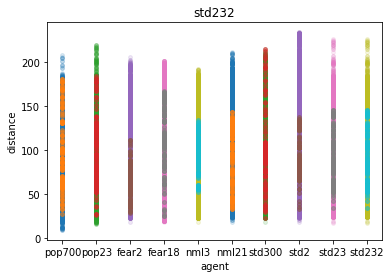

In [24]:
val = 0.25
for index, agent in enumerate(df_list):
    temp = agent[agent["keyNum"]>0]
    plt.scatter("agent", "to_ghosts_mean", alpha=0.15, s=15, data=agent, label = names[index])
    plt.scatter("agent", "to_ghosts_mean", alpha=0.55, s=15, data=temp, label = names[index])
    plt.title(names[index])
    plt.xlabel("agent")
    plt.ylabel("distance")
    
    print(type(df['isDBG'][1]))

In [25]:
combo_df.columns

Index(['action_name', 'action', 'reward', 'episode_reward', 'epoch_reward',
       'total_reward', 'lives', 'end_of_episode', 'end_of_epoch', 'episode',
       'episode_step', 'epoch', 'epoch_step', 'state', 'mean_reward',
       'to_pill_one', 'pill_one_eaten', 'to_pill_two', 'pill_two_eaten',
       'to_pill_three', 'pill_three_eaten', 'to_pill_four', 'pill_four_eaten',
       'to_red_ghost', 'to_pink_ghost', 'to_blue_ghost', 'to_orange_ghost',
       'pacman_coord_x', 'pacman_coord_y', 'red_ghost_coord_x',
       'red_ghost_coord_y', 'pink_ghost_coord_x', 'pink_ghost_coord_y',
       'blue_ghost_coord_x', 'blue_ghost_coord_y', 'orange_ghost_coord_x',
       'orange_ghost_coord_y', 'pacman_direction', 'red_ghost_direction',
       'pink_ghost_direction', 'blue_ghost_direction',
       'orange_ghost_direction', 'dark_blue_ghost1_coord_x',
       'dark_blue_ghost1_coord_y', 'dark_blue_ghost2_coord_x',
       'dark_blue_ghost2_coord_y', 'dark_blue_ghost3_coord_x',
       'dark_blue_ghos

In [26]:
# for index, agent in enumerate(df_list):
#     ax = sns.lmplot(x="to_blue_ghost",y="beforeLifeLoss",logistic=True,data=agent)
#     plt.show()

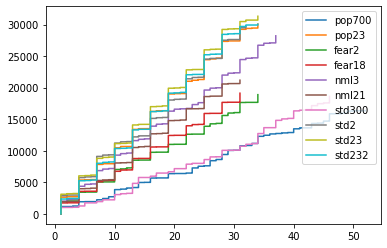

In [27]:
for index, agent in enumerate(df_list):
    plt.plot("episode", "total_reward",data=agent, label = agent_names[index])
    plt.legend(loc="best")
#     plt.yscale("log")

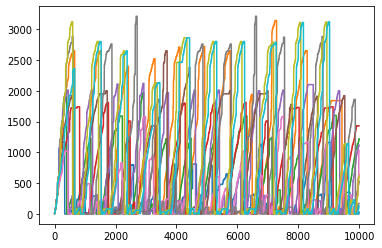

In [28]:
for index, agent in enumerate(df_list):
    plt.plot("state", "episode_reward",data=agent, label = agent_names[index])
#     plt.yscale("log")

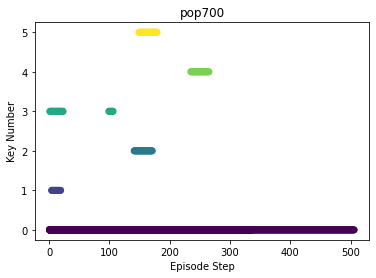

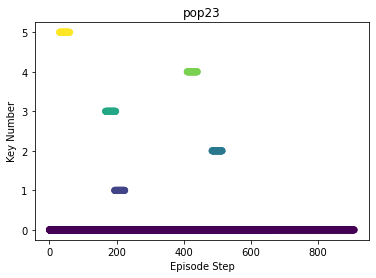

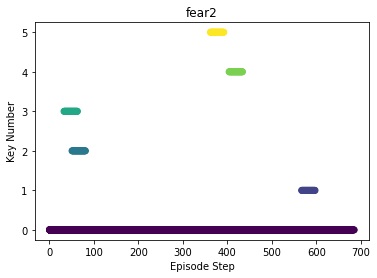

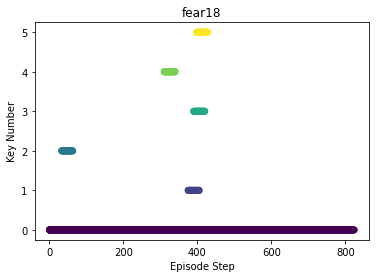

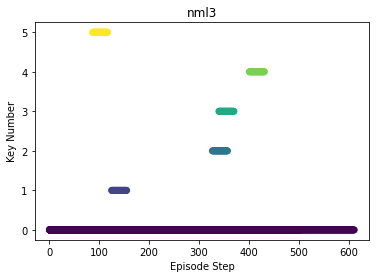

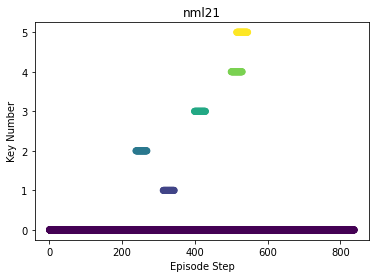

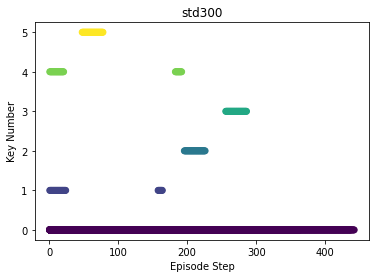

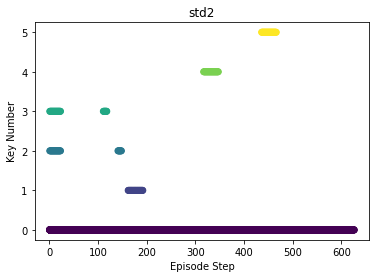

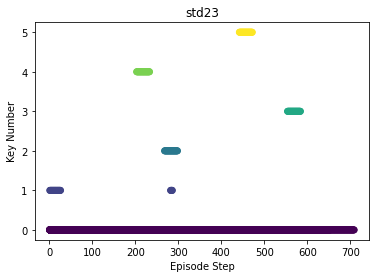

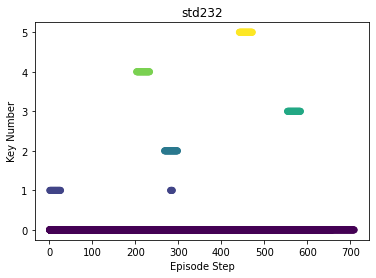

In [29]:
for index, agent in enumerate(df_list):
    plt.scatter("episode_step", "keyNum",c="keyNum",data=agent)
    plt.xlabel("Episode Step")
    plt.ylabel("Key Number")
    plt.title(names[index])
    plt.show()

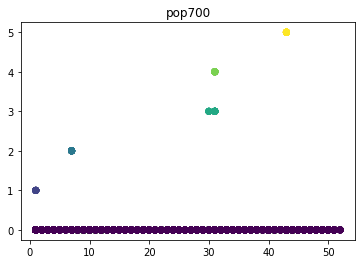

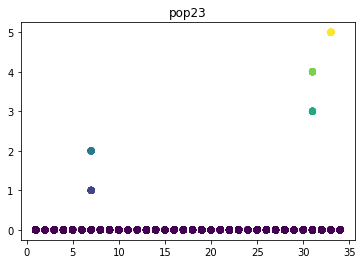

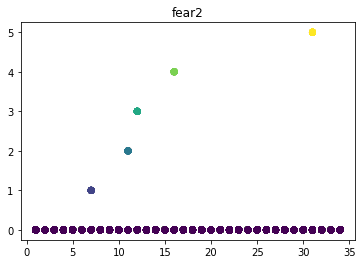

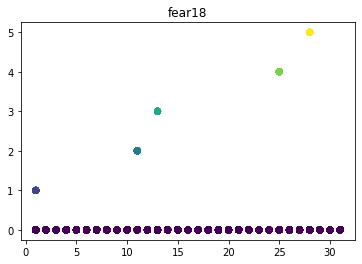

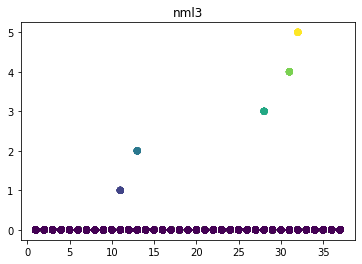

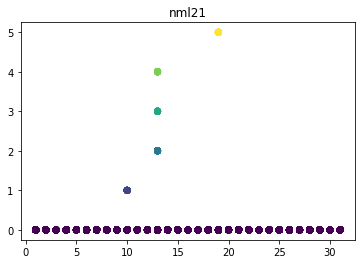

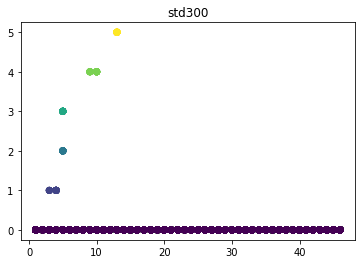

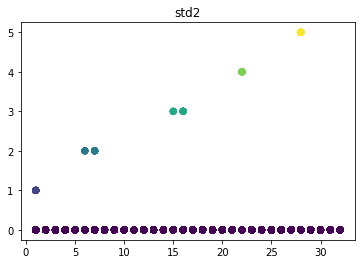

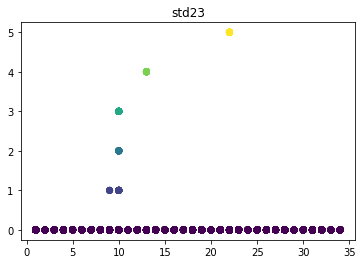

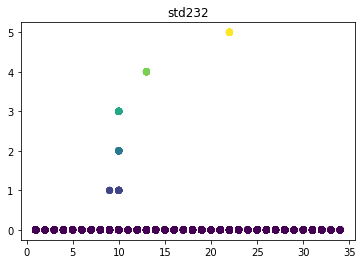

In [30]:
for index, agent in enumerate(df_list):
    plt.scatter("episode", "keyNum",c="keyNum",data=agent)
    plt.title(names[index])
    plt.show()

In [31]:
combo_df.columns

Index(['action_name', 'action', 'reward', 'episode_reward', 'epoch_reward',
       'total_reward', 'lives', 'end_of_episode', 'end_of_epoch', 'episode',
       'episode_step', 'epoch', 'epoch_step', 'state', 'mean_reward',
       'to_pill_one', 'pill_one_eaten', 'to_pill_two', 'pill_two_eaten',
       'to_pill_three', 'pill_three_eaten', 'to_pill_four', 'pill_four_eaten',
       'to_red_ghost', 'to_pink_ghost', 'to_blue_ghost', 'to_orange_ghost',
       'pacman_coord_x', 'pacman_coord_y', 'red_ghost_coord_x',
       'red_ghost_coord_y', 'pink_ghost_coord_x', 'pink_ghost_coord_y',
       'blue_ghost_coord_x', 'blue_ghost_coord_y', 'orange_ghost_coord_x',
       'orange_ghost_coord_y', 'pacman_direction', 'red_ghost_direction',
       'pink_ghost_direction', 'blue_ghost_direction',
       'orange_ghost_direction', 'dark_blue_ghost1_coord_x',
       'dark_blue_ghost1_coord_y', 'dark_blue_ghost2_coord_x',
       'dark_blue_ghost2_coord_y', 'dark_blue_ghost3_coord_x',
       'dark_blue_ghos

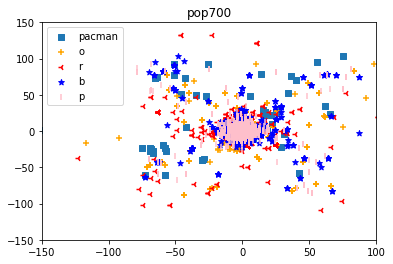

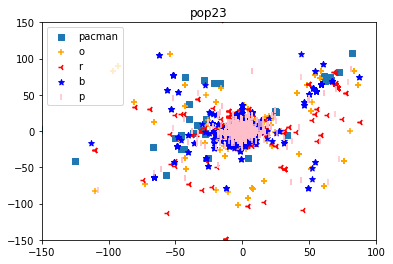

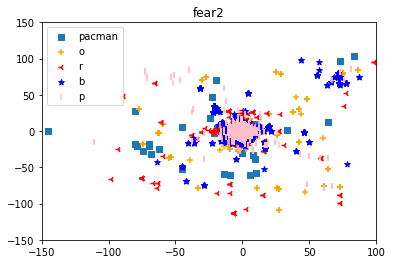

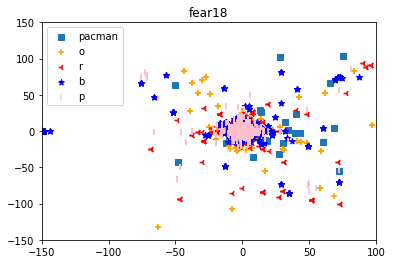

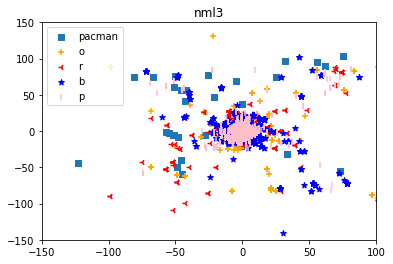

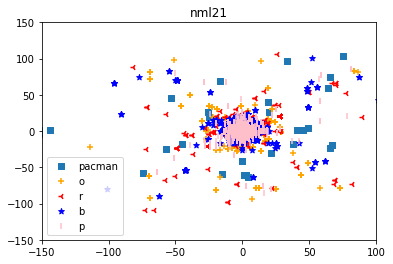

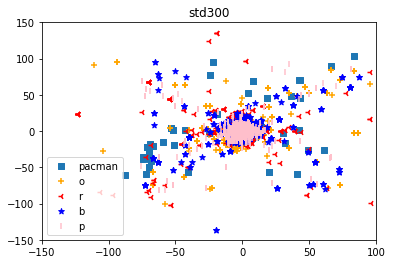

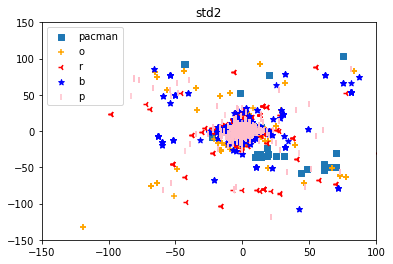

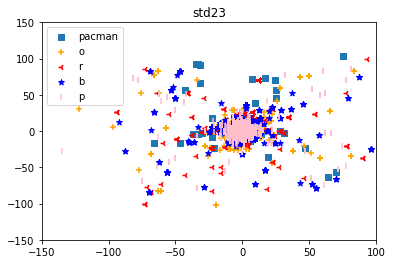

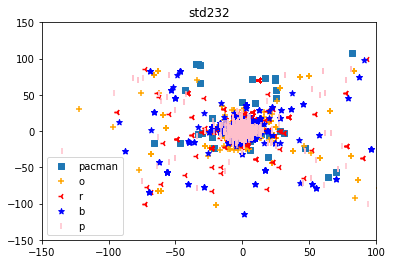

In [32]:
for index, agent in enumerate(df_list):
    x,y = zip(*agent['pacman_direction'])
    plt.scatter(x,y,data=agent, marker=",", label="pacman")
    x,y = zip(*agent['orange_ghost_direction'])
    plt.scatter(x,y,data=agent, c="orange", marker="+", label="o")
    x,y = zip(*agent['red_ghost_direction'])
    plt.scatter(x,y,data=agent, c="r", marker="3", label="r")
    x,y = zip(*agent['blue_ghost_direction'])
    plt.scatter(x,y,data=agent, c="b", marker="*", label="b")
    x,y = zip(*agent['pink_ghost_direction'])
    plt.scatter(x,y,data=agent, c="pink", marker="|", label="p")
    plt.title(names[index])
    plt.xlim(-150,100)
    plt.ylim(-150,150)
    plt.legend(loc="best")
    plt.show()

In [33]:
combo_df.columns

Index(['action_name', 'action', 'reward', 'episode_reward', 'epoch_reward',
       'total_reward', 'lives', 'end_of_episode', 'end_of_epoch', 'episode',
       'episode_step', 'epoch', 'epoch_step', 'state', 'mean_reward',
       'to_pill_one', 'pill_one_eaten', 'to_pill_two', 'pill_two_eaten',
       'to_pill_three', 'pill_three_eaten', 'to_pill_four', 'pill_four_eaten',
       'to_red_ghost', 'to_pink_ghost', 'to_blue_ghost', 'to_orange_ghost',
       'pacman_coord_x', 'pacman_coord_y', 'red_ghost_coord_x',
       'red_ghost_coord_y', 'pink_ghost_coord_x', 'pink_ghost_coord_y',
       'blue_ghost_coord_x', 'blue_ghost_coord_y', 'orange_ghost_coord_x',
       'orange_ghost_coord_y', 'pacman_direction', 'red_ghost_direction',
       'pink_ghost_direction', 'blue_ghost_direction',
       'orange_ghost_direction', 'dark_blue_ghost1_coord_x',
       'dark_blue_ghost1_coord_y', 'dark_blue_ghost2_coord_x',
       'dark_blue_ghost2_coord_y', 'dark_blue_ghost3_coord_x',
       'dark_blue_ghos

In [34]:
subset = combo_df[['pacman_coord_x', 'pacman_coord_y']]
pacman_coord = [np.array(x) for x in subset.to_numpy()]

subset = combo_df[['dark_blue_ghost1_coord_x', 'dark_blue_ghost1_coord_y']]
db1_coord = [np.array(x) for x in subset.to_numpy()]

subset = combo_df[['dark_blue_ghost2_coord_x', 'dark_blue_ghost2_coord_y']]
db2_coord = [np.array(x) for x in subset.to_numpy()]

subset = combo_df[['dark_blue_ghost3_coord_x', 'dark_blue_ghost3_coord_y']]
db3_coord = [np.array(x) for x in subset.to_numpy()]

subset = combo_df[['dark_blue_ghost4_coord_x', 'dark_blue_ghost4_coord_y']]
db4_coord = [np.array(x) for x in subset.to_numpy()]

to_db1 = []
to_db2 = []
to_db3 = []
to_db4 = []
    
for i in range(0,len(pacman_coord)):
    to_db1.append(np.abs(pacman_coord[i] - db1_coord[i]).sum())
    to_db2.append(np.abs(pacman_coord[i] - db2_coord[i]).sum())
    to_db3.append(np.abs(pacman_coord[i] - db3_coord[i]).sum())
    to_db4.append(np.abs(pacman_coord[i] - db4_coord[i]).sum())
                             
combo_df['dist_to_db1'] = to_db1
combo_df['dist_to_db2'] = to_db2
combo_df['dist_to_db3'] = to_db3
combo_df['dist_to_db4'] = to_db4

In [35]:
combo_df['to_db1']

0          0.0
1        179.0
2        174.0
3        169.0
4        173.0
         ...  
99955    117.0
99956    120.0
99957    122.0
99958    128.0
99959    127.0
Name: to_db1, Length: 99960, dtype: float64

In [36]:
to_db1[61:65]


[156.0, 218.0, 151.0, 155.0]

In [37]:
len(combo_df)

99960

In [38]:
for index, agent in enumerate(df_list):
    print(agent.bigRewardNum.unique())
#     plt.scatter("state", "bigRewardNum", data=agent, c="importance", alpha=0.4)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 

In [39]:
combo_df.bigRewardNum.unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55.])

In [40]:
combo_df['bigRewardNum'] = combo_df['bigRewardNum'].fillna(0)
combo_df.bigRewardNum.unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55.])

In [41]:
for index, agent in enumerate(combo_df.agent.unique()):
    print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> " + agent_names[index])
    temp = combo_df[combo_df['agent']==agent]
    print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> " + str(temp.agent.unique()))
    print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> " + str(temp.agentNum.unique()))
    print("Index; " + str(index))
    print(temp[['mean_reward','action','reward']].mean())

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> pop700
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> ['pop700']
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> [0.]
Index; 0
mean_reward    1.887167
action         2.501200
reward         1.637655
dtype: float64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> pop23
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> ['pop23']
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> [1.]
Index; 1
mean_reward    3.312551
action         2.322329
reward         3.009204
dtype: float64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> fear2
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> ['fear2']
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> [2.]
Index; 2
mean_reward    2.283648
action         2.688175
reward         1.889756
dtype: float64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>